# Linear Regression with Scikit Learn - Machine Learning with Python

In [5]:
#creamos un entorno virtual para no descargar todas las librerias sobre nuestro compu
!python -m venv machine_learning

para poder usar el venv de python (y si estás en VS Code) debes ir a la parte superior derecha del ipynb y seleccionar el kernel que acabaste de crear, en mi caso su nombre es "machine_learning"

In [ ]:
#Instalamos las librerias necesarias (esto te recomiendo hacerlo por la terminal)
!pip install pandas --quiet
!pip install jovian

In [2]:
#traemos las librerias que tenemos que usar
from urllib.request import urlretrieve #para descargar los datos de la pagina
import pandas as pd #para crear el dataframe que tendra los datos dentro de el


In [3]:
#descargamos los datos
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, './medical.csv')

('./medical.csv', <http.client.HTTPMessage at 0x24e880ff390>)

In [4]:
#ahora vamos a crear el dataframe en pandas utilizando el archivo descargado para verlo y poder analizarlo.
medical_df = pd.read_csv('./medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
# Si quieres revisar los tipos de dato del dataframe
medical_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


IMPORTANTE!

el BMI es una unidad muy utilizada que significa "Body Mass Index" o "indice de masa corporal" y su formula es la siguiente:

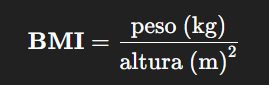

y el ejemplo sería algo como:

Una persona de 70 kg y 1.75 m:

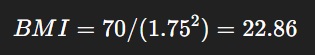

In [15]:
# Entendamos un poco como estan los datos numericos
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Analicemos los datos de la tabla

- A simple vista vemos valores razonables en las columnas como que no hay un minimo de edad negativo ni la cantidad de niños.
- tambien vemos que la desviación estándar es bastante alta en "charges" debido a la diferencia abismal entre el minimo y el maximo que hay en esta columna.

# Exploración, analisis y visualización de los datos

Vamos a ver como se distribuyen los datos en algunas de las columnas del dataset y como se relacionan estos datos con la columna "Charges" y otras columnas.

Usaremos las librerias de Matplotlib, Seaborn y Plotly para la visualización de los datos.

Aqui nos dejan unos tutoriales para usar estas librerías:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [ ]:
# Instalamos las librerias (recomendado hacerlo por la terminal)
!pip install plotly matplotlib seaborn
!python -m pip install -U nbformat #no es necesario, solo instalalo si te da error

In [11]:
# Instalamos las librerias (recomendado en el mismo entorno del kernel, aqui mismo)
!python -m pip install -U ipython

In [5]:
#tuve que hacer el siguiente comando e instalar el nbformat version 4.3.0 porque el nuevo 5.10 al parecer es muy nuevo para fig.show() que utilizamos mas adelante

import nbformat
print(nbformat.__version__)

import sys, subprocess
print(sys.executable)

subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "nbformat", "ipython", "plotly"])

5.10.4
d:\26.cami_wanderex\machine-learning-and-scikit-learn-with-python\machine_learning\Scripts\python.exe


0

In [6]:
#estas son las versiones que usé

print("nbformat", nbformat.__version__)
import plotly
print("plotyly", plotly.__version__)
import IPython, nbformat
print("ipython",IPython.__version__)

nbformat 5.10.4
plotyly 6.5.2
ipython 9.10.0


In [7]:
#importamos estas nuevas librerias para trabajar con ellas

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

#la siguiente linea le dice a jupyter que abra las graficas dentro del notebook donde estamos trabajando justo debajo de la celda donde las generamos.
%matplotlib inline

In [8]:
#ahora, estos van a ser las configuraciones que mejoran el estilo y las fuentes de nuestros gráficos.

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Edad (columna age)

La edad es una columna numérica. La edad mínima en el conjunto de datos es 18 años y la máxima 64. Por lo tanto, podemos visualizar la distribución de la edad mediante un histograma con 47 intervalos (uno por cada año) y un diagrama de caja. Usaremos plotly para que el gráfico sea interactivo, pero puedes crear gráficos similares con Seaborn.

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [21]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# Indice de Masa Corporal

podriamos hacer el mismo histograma pero con el indice ibm

In [29]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

# Cargas (columna "charges")

Ahora vamos a ver la misma visualización pero con la columna Charges y vamos a representar los smoker y los no smoker con colores diferentes

In [11]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Podemos hacer las siguientes observaciones del gráfico anterior: Para la mayoría de los clientes, los gastos médicos anuales son inferiores a $10,000. Solo una pequeña fracción de los clientes tiene gastos médicos más altos, posiblemente debido a accidentes, enfermedades graves y enfermedades genéticas. La distribución sigue una "ley de potencia". Existe una diferencia significativa en los gastos médicos entre fumadores y no fumadores. Mientras que la mediana para los no fumadores es de $7,300,…

### ejercicio

Haz lo mismo con "sex" y "region"

In [21]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey', 'red', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## Fumador

Visualicemos el gráfico por fumadores y no fumadores con sus valores usando un histograma.

In [22]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
px.histogram(medical_df, x='smoker', color='sex', title='smoker')

Parece que el 20% de los clientes reportó que son fumadores. podrias verificar si esto hace sentido con el promedio nacional en los datos recolectados en 2010?, tambien es mas comun que los hombres sean mas fumadores que las mujeres?


#### Ejercicio: Muestre la distribución por sexo, region y por hijos, y valide lo que aparece en el dashboard

In [26]:
histogram_hijos = px.histogram(medical_df, x='children', color='smoker', title='smoker')
histogram_hijos.update_layout(bargap=0.1)
histogram_hijos

In [27]:
histogram_hijos = px.histogram(medical_df, x='region', color='smoker', title='smoker')
histogram_hijos.update_layout(bargap=0.1)
histogram_hijos

Tras analizar cada columna, podemos visualizar la relación entre "gastos" (el valor que queremos predecir) y las demás columnas. 

### Edad y gastos: 

Visualicemos la relación entre "edad" y "gastos" mediante un diagrama de dispersión. Cada punto del diagrama de dispersión representa un cliente. También usaremos los valores de la columna "fumador" para colorear los puntos.

In [30]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Podemos hacer las siguientes observaciones del gráfico anterior: 
- La tendencia general parece ser que los gastos médicos aumentan con la edad, como cabría esperar. Sin embargo, existe una variación significativa a cada edad, y es evidente que la edad por sí sola no puede utilizarse para determinar con precisión los gastos médicos.
- Podemos observar tres "grupos" de puntos, cada uno de los cuales parece formar una línea con pendiente creciente: 

    - El primer y más grande grupo se compone principalmente de presumiblemente "no fumadores sanos" que tienen gastos médicos relativamente bajos en comparación con otros. 

    - El segundo grupo contiene una mezcla de fumadores y no fumadores. Es posible que se trate de dos grupos distintos pero superpuestos: "no fumadores con problemas médicos" y "fumadores sin problemas médicos importantes".

    - El grupo final está formado exclusivamente por fumadores, presumiblemente fumadores con problemas médicos importantes que posiblemente estén relacionados con el tabaquismo o que se agraven con él.

### Ejercicio:
 Que otros comentarios podrias hacer sobre este gráfico.

### BMI y gastos.

 Visualicemos la relación entre el BMI (índice de masa corporal) y los cargos usando otro diagrama de dispersión. De nuevo, usaremos los valores de la columna "fumador" para colorear los puntos.

In [31]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Parece que, para los no fumadores, un aumento del BMI no parece estar relacionado con un aumento de los gastos médicos. Sin embargo, los gastos médicos parecen ser significativamente mayores para los fumadores con un BMI superior a 30. 

¿Qué otras conclusiones puede extraer del gráfico anterior?

### EJERCICIO: 

Crea más gráficos para visualizar la relación entre la columna "Cargos" y las demás columnas ("Niños", "Sexo", "Región" y "Fumador"). Resume la información obtenida de estos gráficos. Sugerencia: Usa gráficos de violín (px.violin) y gráficos de barras (sns.barplot).

In [32]:
px.scatter(medical_df, x='children', y='charges')

In [33]:
px.violin(medical_df, x='children', y='charges')

### Correlación. 

Como se puede observar en el análisis, los valores de algunas columnas están más estrechamente relacionados con los valores de "cargos" que en otras. Por ejemplo, "edad" y "cargos" parecen crecer juntos, mientras que "BMI" y "cargos" no. Esta relación suele expresarse numéricamente mediante una medida llamada coeficiente de correlación, que puede calcularse con el método .corr de una serie de Pandas. 

In [34]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [35]:
medical_df.charges.corr(medical_df.bmi)


np.float64(0.19834096883362878)

In [36]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790469)

Para calcular la correlación de las columnas categóricas, primero deben convertirse en columnas numéricas.

In [37]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

Así es como se pueden interpretar los coeficientes de correlación

### Fuerza: Cuanto mayor sea el valor absoluto del coeficiente de correlación, más fuerte será la relación. 

- Los valores extremos de 1 y 1 indican una relación perfectamente lineal, donde un cambio en una variable va acompañado de un cambio perfectamente consistente en la otra. En estas relaciones, todos los puntos de datos se encuentran en una línea. En la práctica, no se observará ningún tipo de relación perfecta.

- Un coeficiente de cero representa una relación no lineal. A medida que una variable aumenta, la otra no tiende a aumentar ni a disminuir.

- Cuando el valor está entre 0 y +1/-1, existe una relación, pero no todos los puntos se encuentran en una línea. A medida que r se acerca a 1 o 1, la fuerza de la relación aumenta y los puntos de datos tienden a acercarse a una línea.

### Dirección El signo del coeficiente de correlación representa la dirección de la relación.

- Los coeficientes positivos indican que cuando el valor de una variable aumenta, el valor de la otra también tiende a aumentar. Las relaciones positivas producen una pendiente ascendente en un diagrama de dispersión. 

- Los coeficientes negativos representan casos en los que, cuando el valor de una variable aumenta, el valor de la otra tiende a disminuir. Las relaciones negativas producen una pendiente descendente.

### Aquí está la misma relación expresada visualmente.

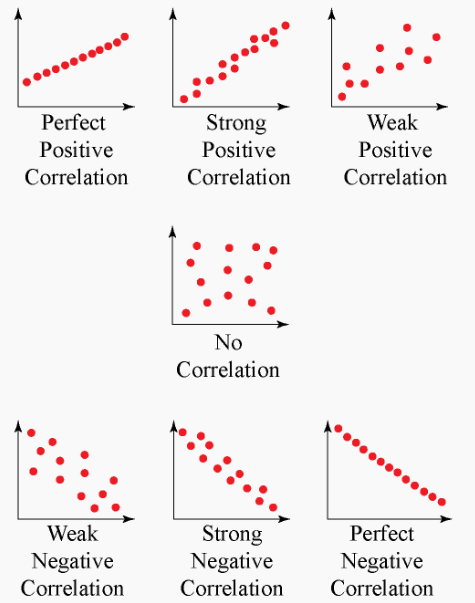

### El coeficiente de correlación tiene la siguiente fórmula

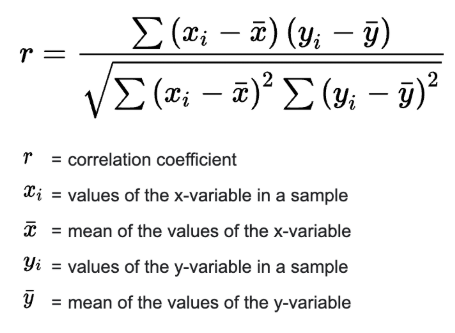

Puede obtener más información sobre la definición matemática y la interpretación geométrica de la correlación aquí: https://www.youtube.com/watch?v=xZ_z8KWkhXE 

Los marcos de datos de Pandas también proporcionan un método .corr para calcular los coeficientes de correlación entre todos los pares de columnas numéricas.

In [39]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


El resultado de .corr se denomina matriz de correlación y a menudo se visualiza mediante un mapa de calor.

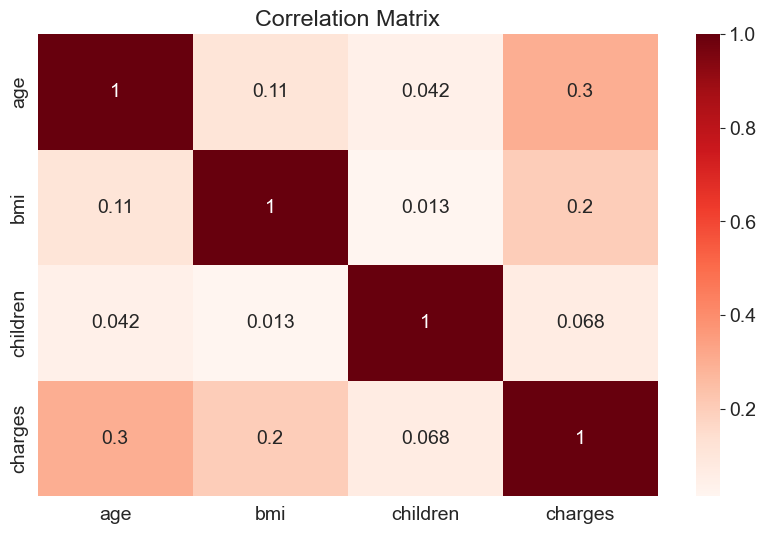

In [ ]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

### Falacia de correlación vs. causalidad: 

Cabe destacar que una correlación alta no permite interpretar una relación causa-efecto entre características. Dos características,    X y    Y, pueden correlacionarse si    X causa    Y o si    Y causa    X, o si ambas son causadas independientemente por otro factor    Z, y la correlación dejará de ser válida si se rompe una de las relaciones causa-efecto. También es posible que    X y    Y simplemente parezcan estar correlacionadas porque la muestra es demasiado pequeña.

Aunque esto pueda parecer obvio, las computadoras no pueden diferenciar entre correlación y causalidad, y las decisiones basadas en sistemas automatizados a menudo pueden tener consecuencias importantes para la sociedad. Por lo tanto, es importante estudiar por qué los sistemas automatizados conducen a un resultado determinado. Determinar las relaciones causa-efecto requiere perspicacia humana.